This is a model of energy consumption and analysis on the energy provisioning capacity and effectiveness of an energy storage battery over 24 months. This model deliberately excludes factors such as usable capacity, peak load, loss of energy over time, energy conversion by heat. Off peak tariff is between 7pm to 6.59am and battery is assumed to be at full capacity at the start of each peak period between 7am to 6.59pm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
energy_data_frame = pd.read_csv('./data/Power-Networks-LCL-June2015(withAcornGps)v2_1.csv', index_col='DateTime')

In [3]:
energy_data_frame.index = pd.to_datetime(energy_data_frame.index, infer_datetime_format=True)

In [4]:
energy_data_frame = energy_data_frame.drop(['stdorToU', 'Acorn', 'Acorn_grouped'], axis=1)

In [5]:
energy_data_frame['consumption'] = pd.to_numeric(energy_data_frame['KWH/hh (per half hour) '], errors='coerce')

In [6]:
energy_data_frame = energy_data_frame.drop(['KWH/hh (per half hour) '], axis=1)

In [7]:
energy_data_frame = energy_data_frame.pivot_table(values='consumption', index=['DateTime'], columns=['LCLid'] )

In [8]:
energy_data_frame = energy_data_frame.resample('h').sum()

In [9]:
energy_data_id = pd.DataFrame(index=energy_data_frame.index, columns=['consumption'])

In [10]:
energy_data_id['consumption']  = energy_data_frame['MAC000030']

In [11]:
energy_data_id.head()

,consumption
DateTime,
2011-12-06 13:00:00,0.0
2011-12-06 14:00:00,0.0
2011-12-06 15:00:00,0.0
2011-12-06 16:00:00,0.0
2011-12-06 17:00:00,0.0


In [12]:
energy_data_id_2012_2013 = energy_data_id['2012':'2013']

In [13]:
totalDays = 731

In [14]:
df1 = energy_data_id_2012_2013.between_time(start_time='7:00', end_time='18:59')

In [15]:
df1 = df1.resample('d').sum()

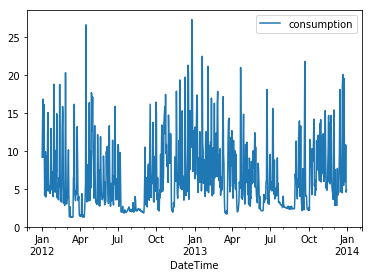

In [16]:
df1.plot()

This graph displays the total energy consumption during peaks hours daily over a period of 2 years

In [17]:
df1['5kWh'] = df1['consumption'] - 5
df1['7.5kWh'] = df1['consumption'] - 7.5
df1['10kWh'] = df1['consumption'] - 10
df1['12.5kWh'] = df1['consumption'] - 12.5
df1['15kWh'] = df1['consumption'] - 15

In [18]:
df1.head()

,consumption,5kWh,7.5kWh,10kWh,12.5kWh,15kWh
DateTime,,,,,,
2012-01-01,9.179,4.179,1.679,-0.821,-3.321,-5.821
2012-01-02,13.858,8.858,6.358,3.858,1.358,-1.142
2012-01-03,16.810,11.810,9.310,6.810,4.310,1.810
2012-01-04,9.171,4.171,1.671,-0.829,-3.329,-5.829
2012-01-05,16.142,11.142,8.642,6.142,3.642,1.142


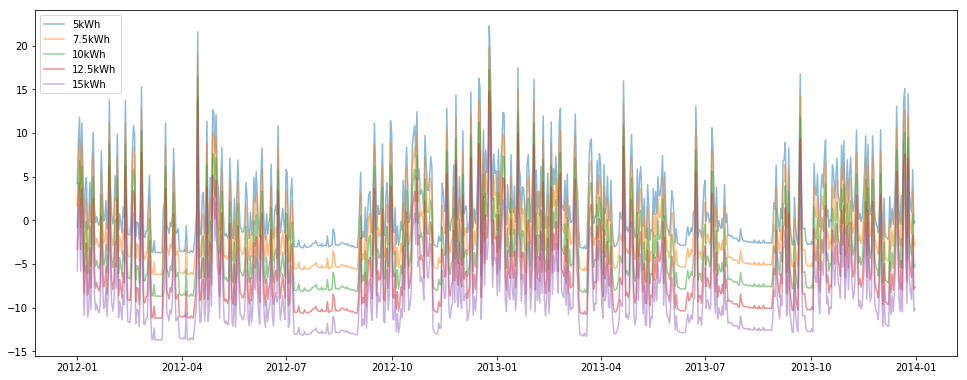

In [19]:
fig = plt.figure(figsize=(16, 6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(df1['5kWh'], alpha=0.5)
axes.plot(df1['7.5kWh'], alpha=0.5)
axes.plot(df1['10kWh'], alpha=0.5)
axes.plot(df1['12.5kWh'], alpha=0.5)
axes.plot(df1['15kWh'], alpha=0.5)
axes.legend()

This graph displays how the total consumption of energy is provisioned with the various battery sizes over the period of two years. Values along zero mean that the battery capacity covered the consumption needs for that day. Positive values indicate an under provision which means that consumption exceeded capacity. Negative values indicate an over provision which means the battery has spare capacity.

In [20]:
total5kWh = df1['5kWh'].sum() / totalDays
total75kWh = df1['7.5kWh'].sum() / totalDays
total10kWh = df1['10kWh'].sum() / totalDays
total125kWh = df1['12.5kWh'].sum() / totalDays
total15kWh = df1['15kWh'].sum() / totalDays

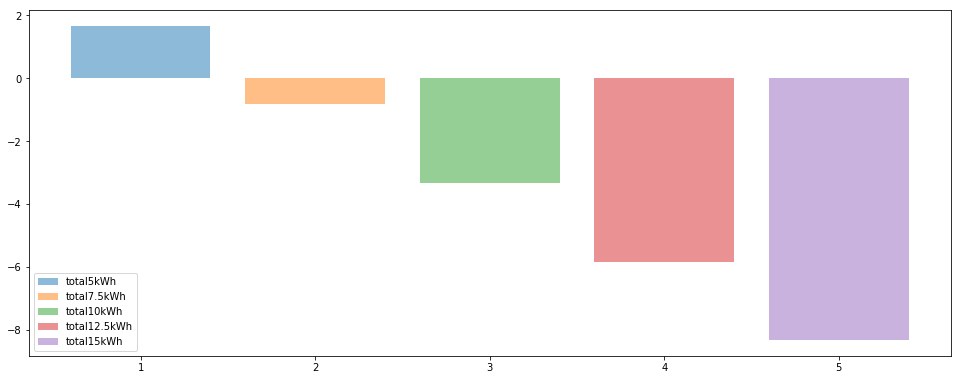

In [21]:
fig = plt.figure(figsize=(16, 6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.bar(1, [total5kWh], alpha=0.5, label='total5kWh')
plt.bar(2, [total75kWh], alpha=0.5, label='total7.5kWh')
plt.bar(3, [total10kWh], alpha=0.5, label='total10kWh')
plt.bar(4, [total125kWh], alpha=0.5, label='total12.5kWh')
plt.bar(5, [total15kWh], alpha=0.5, label='total15kWh')
axes.legend()

This graph displays how well the total energy consumed during peak time is provisioned by various battery sizes averaged over the two years. A positive number means an underprovision and the total capacity of the battery consumed. A negative figure means an overprovision which can be interpreted as spare capacity.

In [22]:
totalPossibleUtilisation5kWh = totalDays * 5
totalPossibleUtilisation75kWh = totalDays * 7.5
totalPossibleUtilisation10kWh = totalDays * 10
totalPossibleUtilisation125kWh = totalDays * 12.5
totalPossibleUtilisation15kWh = totalDays * 15

In [23]:
df1.loc[df1['consumption'] > 5, '5kWhUtil'] = 5
df1.loc[df1['consumption'] <= 5, '5kWhUtil'] = df1['consumption']
df1.loc[df1['consumption'] > 7.5, '7.5kWhUtil'] = 7.5
df1.loc[df1['consumption'] <= 7.5, '7.5kWhUtil'] = df1['consumption']
df1.loc[df1['consumption'] > 10, '10kWhUtil'] = 10
df1.loc[df1['consumption'] <= 10, '10kWhUtil'] = df1['consumption']
df1.loc[df1['consumption'] > 12.5, '12.5kWhUtil'] = 12.5
df1.loc[df1['consumption'] <= 12.5, '12.5kWhUtil'] = df1['consumption']
df1.loc[df1['consumption'] > 15, '15kWhUtil'] = 15
df1.loc[df1['consumption'] <= 15, '15kWhUtil'] = df1['consumption']

In [24]:
total5kWhUtil = df1['5kWhUtil'].sum()
total75kWhUtil = df1['7.5kWhUtil'].sum()
total10kWhUtil = df1['10kWhUtil'].sum()
total125kWhUtil = df1['12.5kWhUtil'].sum()
total15kWhUtil = df1['15kWhUtil'].sum()

In [25]:
util5kWh = total5kWhUtil / totalPossibleUtilisation5kWh * 100
util75kWh = total75kWhUtil / totalPossibleUtilisation75kWh * 100
util10kWh = total10kWhUtil / totalPossibleUtilisation10kWh * 100
util125kWh = total125kWhUtil / totalPossibleUtilisation125kWh * 100
util15kWh = total15kWhUtil / totalPossibleUtilisation15kWh * 100

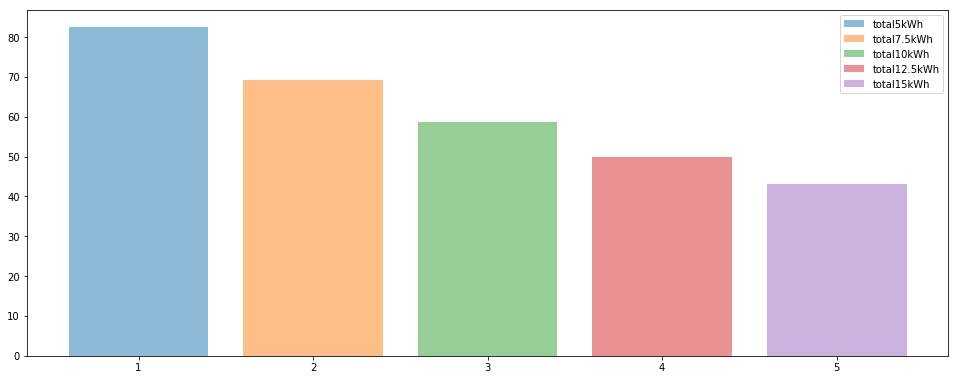

In [26]:
fig = plt.figure(figsize=(16, 6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.bar(1, [util5kWh], alpha=0.5, label='total5kWh')
plt.bar(2, [util75kWh], alpha=0.5, label='total7.5kWh')
plt.bar(3, [util10kWh], alpha=0.5, label='total10kWh')
plt.bar(4, [util125kWh], alpha=0.5, label='total12.5kWh')
plt.bar(5, [util15kWh], alpha=0.5, label='total15kWh')
axes.legend()

This graph displays how much of the batteries capacity was consumed against the total possible consumption the battery could have provided and displayed as a percentage. This is an indication of how much the battery has been utilised over the period. A figure close